In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
orders = pd.read_csv('orders.csv')
nodes = pd.read_csv('nodes.csv')
orders_kag = pd.read_csv('orders_kag.csv')
nodes_kag = pd.read_csv('nodes_kag.csv')
test = pd.read_csv('test.csv')

In [149]:
nodes_kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480291 entries, 0 to 480290
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           480291 non-null  int64  
 1   node_start   480291 non-null  int64  
 2   node_finish  480291 non-null  int64  
 3   distance     480291 non-null  float64
 4   speed        476307 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 18.3 MB


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1000 non-null   int64  
 1   running_time       1000 non-null   object 
 2   route_distance_km  1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [14]:
s1 = set(nodes[nodes['Id'] == 5349031716632009753]['node_start'])
s2 = set(nodes[nodes['Id'] == 5349031716632009753]['node_finish'])

In [17]:
s2 - s1

{289702919, 1977036275, 1977036281}

In [22]:
sum(nodes[nodes['Id'] == 5349031716632009753]['distance'])

497.5769769999999

In [21]:
orders[orders['Id'] == 5349031716632009753]

,Id,running_time,completed_time,route_distance_km,delta_time
9,5349031716632009753,2022-01-24 07:29:34,2022-01-24 07:35:43,1.113,369.0


In [65]:
orders_kag['Id']

0      -4773019581999572651
1      -7575630690398473489
2      -6264582368520213833
3       5964315354301636538
4       1372379574816145639
               ...         
4995    7096714159023973792
4996   -3836026425968071806
4997    2926216435675216636
4998   -6677307480063489707
4999   -4845695090750648713
Name: Id, Length: 5000, dtype: int64

In [82]:
test['Id']

0      4567450496676323264
1     -1762687449608244695
2       558209096572647780
3      1091960336272216078
4     -1321994599972009663
              ...         
995   -1019532991501300185
996   -3501571252544462083
997    8305010046033518305
998    5747749188503396733
999    8646925889615811725
Name: Id, Length: 1000, dtype: int64

In [84]:
ID = 4567450496676323264

In [85]:
s1 = set(nodes_kag[nodes_kag['Id'] == ID]['node_start'])
s2 = set(nodes_kag[nodes_kag['Id'] == ID]['node_finish'])

s2 - s1

{710165783, 5983175970}

In [86]:
sum(nodes_kag[nodes_kag['Id'] == ID]['distance'])

2275.576895

In [88]:
test[test['Id'] == ID]

,Id,running_time,route_distance_km
0,4567450496676323264,2022-01-24 00:32:37,5.533


In [87]:
orders_kag[orders_kag['Id'] == ID]

,Id,running_time,completed_time,route_distance_km,delta_time


In [92]:
len(set(orders_kag['Id'])-set(test['Id']))

5000

# Features

In [107]:
train = orders_kag.copy()

In [108]:
train.drop('completed_time', axis = 1, inplace=True)

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 5000 non-null   int64  
 1   running_time       5000 non-null   object 
 2   route_distance_km  5000 non-null   float64
 3   delta_time         5000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 156.4+ KB


In [110]:
train['running_time'] = pd.to_datetime(train['running_time'])

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 5000 non-null   int64         
 1   running_time       5000 non-null   datetime64[ns]
 2   route_distance_km  5000 non-null   float64       
 3   delta_time         5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 156.4 KB


In [132]:
train['running_time'].median()

Timestamp('2022-01-24 12:48:33.500000')

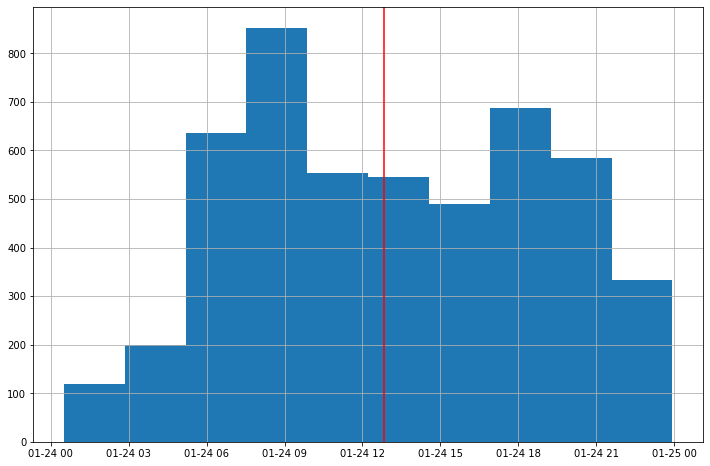

In [131]:
plt.figure(figsize=(12,8))
train.sort_values('running_time')['running_time'].hist()
plt.axvline(train['running_time'].median(), color = 'r')
plt.show()

In [137]:
train.iloc[0, 1].hour

18

In [139]:
train['hours'] = train['running_time'].apply(lambda x: x.hour)

In [140]:
train

,Id,running_time,route_distance_km,delta_time,hours
0,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,18
1,-7575630690398473489,2022-01-24 06:53:53,3.526,753.0,6
2,-6264582368520213833,2022-01-24 10:00:59,5.071,899.0,10
3,5964315354301636538,2022-01-24 14:28:05,2.867,423.0,14
4,1372379574816145639,2022-01-24 11:57:29,3.751,540.0,11
...,...,...,...,...,...
4995,7096714159023973792,2022-01-24 21:10:38,7.397,795.0,21
4996,-3836026425968071806,2022-01-24 15:10:27,1.948,594.0,15
4997,2926216435675216636,2022-01-24 13:57:04,2.547,374.0,13
4998,-6677307480063489707,2022-01-24 08:46:13,3.013,561.0,8


In [147]:
train['sym_hours_periods'] = train['hours'].apply(lambda x: abs(x-12) if x-12 <= 0 else abs(x-13))

In [148]:
train

,Id,running_time,route_distance_km,delta_time,hours,sym_hours_periods
0,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,18,5
1,-7575630690398473489,2022-01-24 06:53:53,3.526,753.0,6,6
2,-6264582368520213833,2022-01-24 10:00:59,5.071,899.0,10,2
3,5964315354301636538,2022-01-24 14:28:05,2.867,423.0,14,1
4,1372379574816145639,2022-01-24 11:57:29,3.751,540.0,11,1
...,...,...,...,...,...,...
4995,7096714159023973792,2022-01-24 21:10:38,7.397,795.0,21,8
4996,-3836026425968071806,2022-01-24 15:10:27,1.948,594.0,15,2
4997,2926216435675216636,2022-01-24 13:57:04,2.547,374.0,13,0
4998,-6677307480063489707,2022-01-24 08:46:13,3.013,561.0,8,4


In [14]:
def data_transform(df_ord, df_nod, type_ = None):
    
    if type_ == 'train':
        df_ord.drop('completed_time', axis = 1, inplace=True)
    else:
        pass
    
    df_ord['running_time'] = pd.to_datetime(df_ord['running_time'])
    df_ord['hours'] = df_ord['running_time'].apply(lambda x: x.hour)
    df_ord['sym_hours_periods'] = df_ord['hours'].apply(lambda x: abs(x-12) if x-12 <= 0 else abs(x-13))
    
    speed_means = df_nod.groupby("Id")['speed'].mean()
    
    i = 0
    for row in df_nod.values:
        if np.isnan(row[4]):
            df_nod.iloc[i, 4] = df_nod[df_nod['Id'] == row[0]]['speed'].mean(skipna = True)
        i+=1
        
    df_nod['time'] = df_nod.apply(lambda x: (float(x[3])/float(x[4]))/1000*3600, axis = 1)
    
    if df_nod[df_nod['speed'].isnull()]['Id'].sum() != 0:
        print(df_nod[df_nod['speed'].isnull()]['Id'].sum())
        raise ValueError('u have nans')
    else:
        pass
    
    time_sum = df_nod.groupby("Id")['time'].sum()
    df_ord = df_ord.merge(time_sum, left_on='Id', right_on='Id')
    
    dist_sum = df_nod.groupby("Id")['distance'].sum()
    df_ord = df_ord.merge(dist_sum, left_on='Id', right_on='Id')
    
    df_ord['route_distance_km'] = df_ord['route_distance_km']*1000
    df_ord['speed_from_node'] = df_ord['distance']/df_ord['time']
    
    ind_dict = df_nod.groupby('Id').indices
    diff_nodes = {}
    
    for key in ind_dict.keys():
        diff_nodes[key] = len(set(df_nod.iloc[ind_dict[key], 1])-set(df_nod.iloc[ind_dict[key], 2]))
        
    diff_nodes_df = pd.DataFrame(data=diff_nodes.items(), columns=['Id','diff_nodes'])
    df_ord = df_ord.merge(diff_nodes_df, left_on='Id', right_on='Id')
    
    df_ord['diff_dist'] = df_ord["route_distance_km"] - df_ord["distance"]
    
    df_ord.drop('running_time', axis = 1, inplace=True)
    
    return df_ord, df_nod

In [15]:
df_ord, df_nod = orders_kag.copy(), nodes_kag.copy()

tr_ord, tr_nod = data_transform(df_ord, df_nod, type_='train')

In [16]:
tr_ord

,Id,route_distance_km,delta_time,hours,sym_hours_periods,time,distance,speed_from_node,diff_nodes,diff_dist
0,-4773019581999572651,3740.0,862.0,18,5,445.785429,3470.256759,7.784590,2,269.743241
1,-7575630690398473489,3526.0,753.0,6,6,339.653051,2918.173868,8.591632,2,607.826132
2,-6264582368520213833,5071.0,899.0,10,2,555.516246,4564.939071,8.217472,5,506.060929
3,5964315354301636538,2867.0,423.0,14,1,327.574647,2613.543847,7.978468,2,253.456153
4,1372379574816145639,3751.0,540.0,11,1,412.088153,4061.531629,9.855978,1,-310.531629
...,...,...,...,...,...,...,...,...,...,...
4995,7096714159023973792,7397.0,795.0,21,8,548.510212,5207.917284,9.494659,2,2189.082716
4996,-3836026425968071806,1948.0,594.0,15,2,342.160014,2017.743832,5.897077,1,-69.743832
4997,2926216435675216636,2547.0,374.0,13,0,267.563772,2186.855130,8.173211,2,360.144870
4998,-6677307480063489707,3013.0,561.0,8,4,309.542469,2473.299895,7.990180,2,539.700105


In [17]:
tr_ord.to_csv('train_data.csv')

In [18]:
test = pd.read_csv('test.csv')

df_ord, df_nod = test.copy(), nodes_kag.copy()
ts_ord, ts_nod = data_transform(df_ord, df_nod, type_='test')

In [19]:
ts_ord

,Id,route_distance_km,hours,sym_hours_periods,time,distance,speed_from_node,diff_nodes,diff_dist
0,4567450496676323264,5533.0,0,12,270.098851,2275.576895,8.424978,2,3257.423105
1,-1762687449608244695,4448.0,0,12,100.585544,894.017302,8.888129,2,3553.982698
2,558209096572647780,2751.0,0,12,290.640752,2433.800222,8.373912,1,317.199778
3,1091960336272216078,4435.0,1,11,372.676359,4150.487634,11.136976,3,284.512366
4,-1321994599972009663,2394.0,1,11,310.831511,2627.683955,8.453724,2,-233.683955
...,...,...,...,...,...,...,...,...,...
995,-1019532991501300185,2665.0,23,10,289.017731,2558.496155,8.852385,2,106.503845
996,-3501571252544462083,2353.0,23,10,273.465564,2222.992744,8.128968,1,130.007256
997,8305010046033518305,2914.0,23,10,261.223101,2719.411633,10.410303,1,194.588367
998,5747749188503396733,9019.0,23,10,920.177517,8662.861656,9.414337,3,356.138344


In [20]:
ts_ord.to_csv('test_data.csv')

In [22]:
df_ord, df_nod = orders.copy(), nodes.copy()

tr_ord, tr_nod = data_transform(df_ord, df_nod, type_='train')

In [23]:
tr_ord.to_csv('train_data1.csv')